# DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
DBSCAN is a density-based clustering algorithm that groups data points that are **closely packed together** and **marks outliers as noise** based on their density in the feature space.
- Here we have used some sythetic data for applying **DBSCAN**


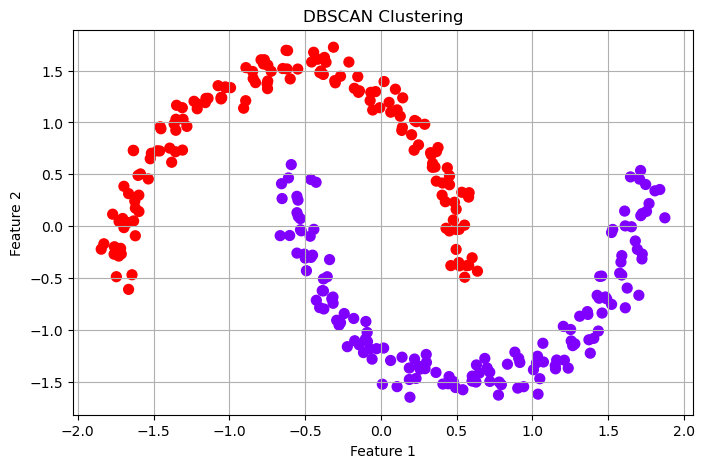

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

**Interpretation:**
- The algorithm has identified **two separate clusters**, represented by the red and purple colors.
- The clusters are shaped like two interlocking crescent moons. This is a classic dataset used to test clustering algorithms, and DBSCAN's ability to identify these non-linear shapes demonstrates its major strength over other algorithms like **K-Means**, which struggle with non-spherical clusters.
- The clear separation of colors indicates that the DBSCAN algorithm effectively grouped the data points based on their density. Points that are close to each other in dense regions were assigned to the **same cluster** (either red or purple).

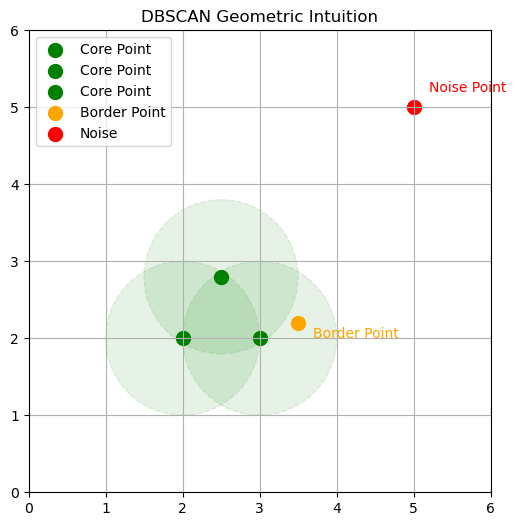

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Sample points representing core, border, and noise
core_points = np.array([[2, 2], [3, 2], [2.5, 2.8]])
border_points = np.array([[3.5, 2.2]])
noise_points = np.array([[5, 5]])

# Epsilon neighborhood radius
epsilon = 1.0

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot core points with circles
for point in core_points:
    ax.scatter(*point, c='green', s=100, label='Core Point')
    circle = Circle(point, epsilon, color='green', alpha=0.1, linestyle='--')
    ax.add_patch(circle)

# Plot border points
ax.scatter(border_points[:, 0], border_points[:, 1], c='orange', s=100, label='Border Point')

# Plot noise points
ax.scatter(noise_points[:, 0], noise_points[:, 1], c='red', s=100, label='Noise')

# Annotations
ax.annotate("Noise Point", noise_points[0] + np.array([0.2, 0.2]), color='red')
ax.annotate("Border Point", border_points[0] + np.array([0.2, -0.2]), color='orange')

# Plot settings
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.set_title('DBSCAN Geometric Intuition')
ax.legend()
plt.grid(True)
plt.show()

**Interpretation:**
- **Core Poitns(Green):** The two green dots are classified as **Core Points**. This is because if you draw a circle (the faint green circles) around each of them, they both contain at least the minimum number of points required (in this case, likely 3 points: the core point itself and two other points). Core points are in the interior of a cluster.
- **Border Point (Orange):** The orange dot is a **Border Point**. While it is reachable by a core point (it's inside the neighborhood of the lower green core point), its own neighborhood does not contain the minimum number of points. Border points are on the edge of a cluster.
- **Noise Point (Red):** The red dot is a **Noise Point** or an **outlie**r. It is neither a core point (its neighborhood is empty) nor a border point (it's not within the neighborhood of any core point). It's isolated from the dense cluster.
  
Hence, the graph perfectly demonstrates how DBSCAN identifies a cluster as a dense region of points (the green and orange points) and separates it from sparse, isolated points (the red point).